#IMPORTING THE LIBRARIES

In [45]:
!pip install --upgrade xgboost scikit-learn


  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [46]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("Scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.3
Scikit-learn version: 1.0.2


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn import metrics

Loading the Data Sets

In [48]:
Big_mart_data=pd.read_csv('/content/Big_Mart_Sales.csv')

In [49]:
Big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- item type
- outlet size
- outlet location type
- outlet type


In [50]:
Big_mart_data.shape

(8523, 12)

#HADLING MISSING DATA POINTS

In [51]:
Big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [52]:
Big_mart_data['Item_Weight'].mean()

12.857645184135976

In [53]:
Big_mart_data['Item_Weight'].fillna(Big_mart_data['Item_Weight'].mean(),inplace=True)

In [54]:
Big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [55]:
mode_of_outlet_Size = Big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode()[0])

In [56]:
print(mode_of_outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [57]:
missing_values =Big_mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [58]:
Big_mart_data.loc[missing_values, 'Outlet_Size'] = Big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_Size[x])


In [59]:
Big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#DATA ANALYSIS
- VISUVALIZATION

In [60]:
Big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
sns.set()

<ipython-input-62-1d71ac761b52>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Big_mart_data['Item_Weight'])


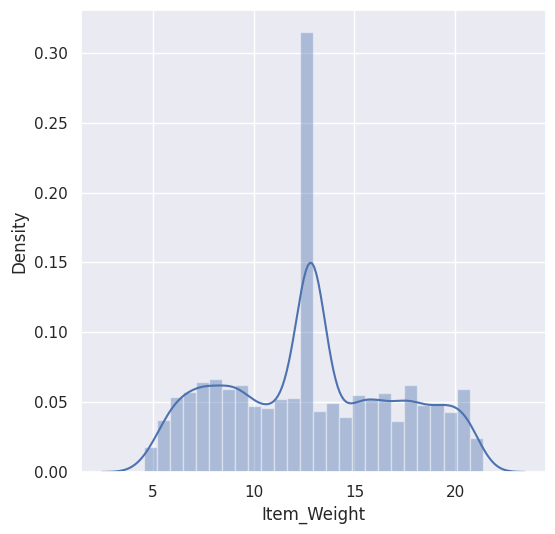

In [62]:
plt.figure(figsize=(6,6))
sns.distplot(Big_mart_data['Item_Weight'])
plt.show()

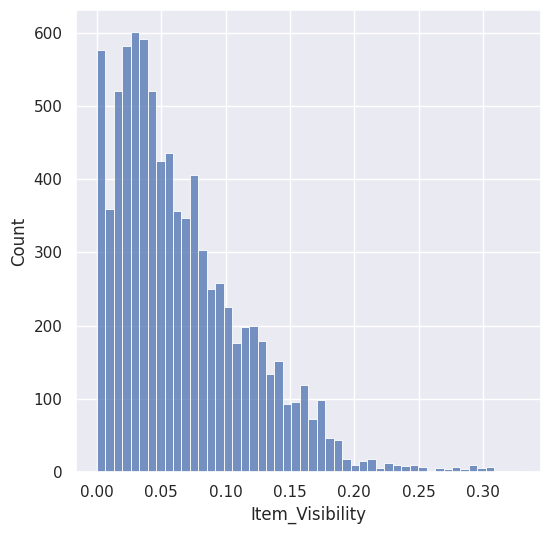

In [63]:
plt.figure(figsize=(6,6))
sns.histplot(Big_mart_data['Item_Visibility'])
plt.show()

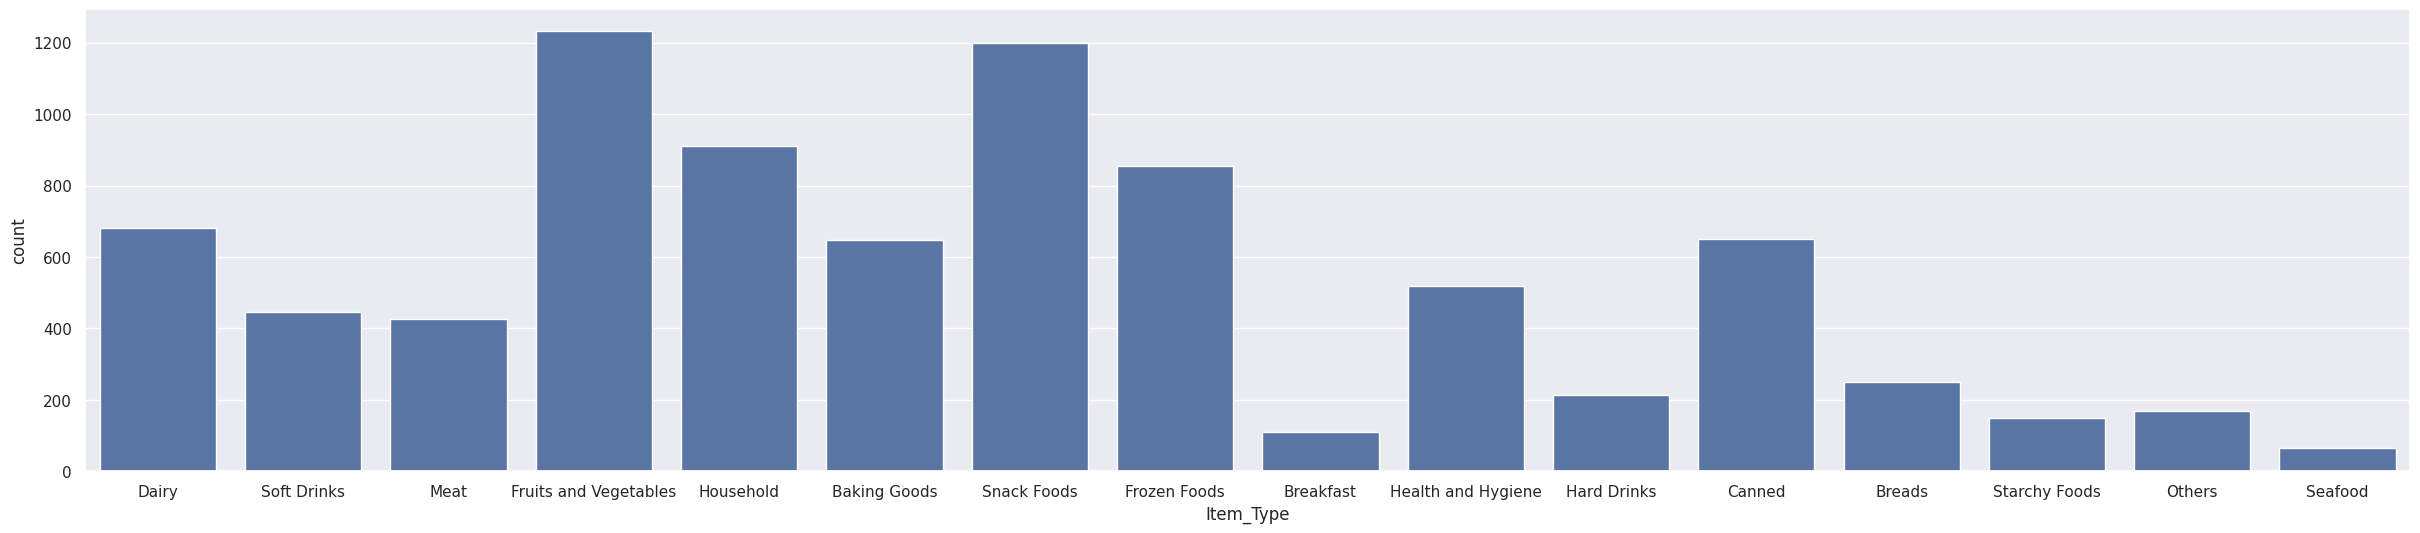

In [64]:
plt.figure(figsize=(30,6))
sns.countplot(data=Big_mart_data,x='Item_Type')
plt.show()

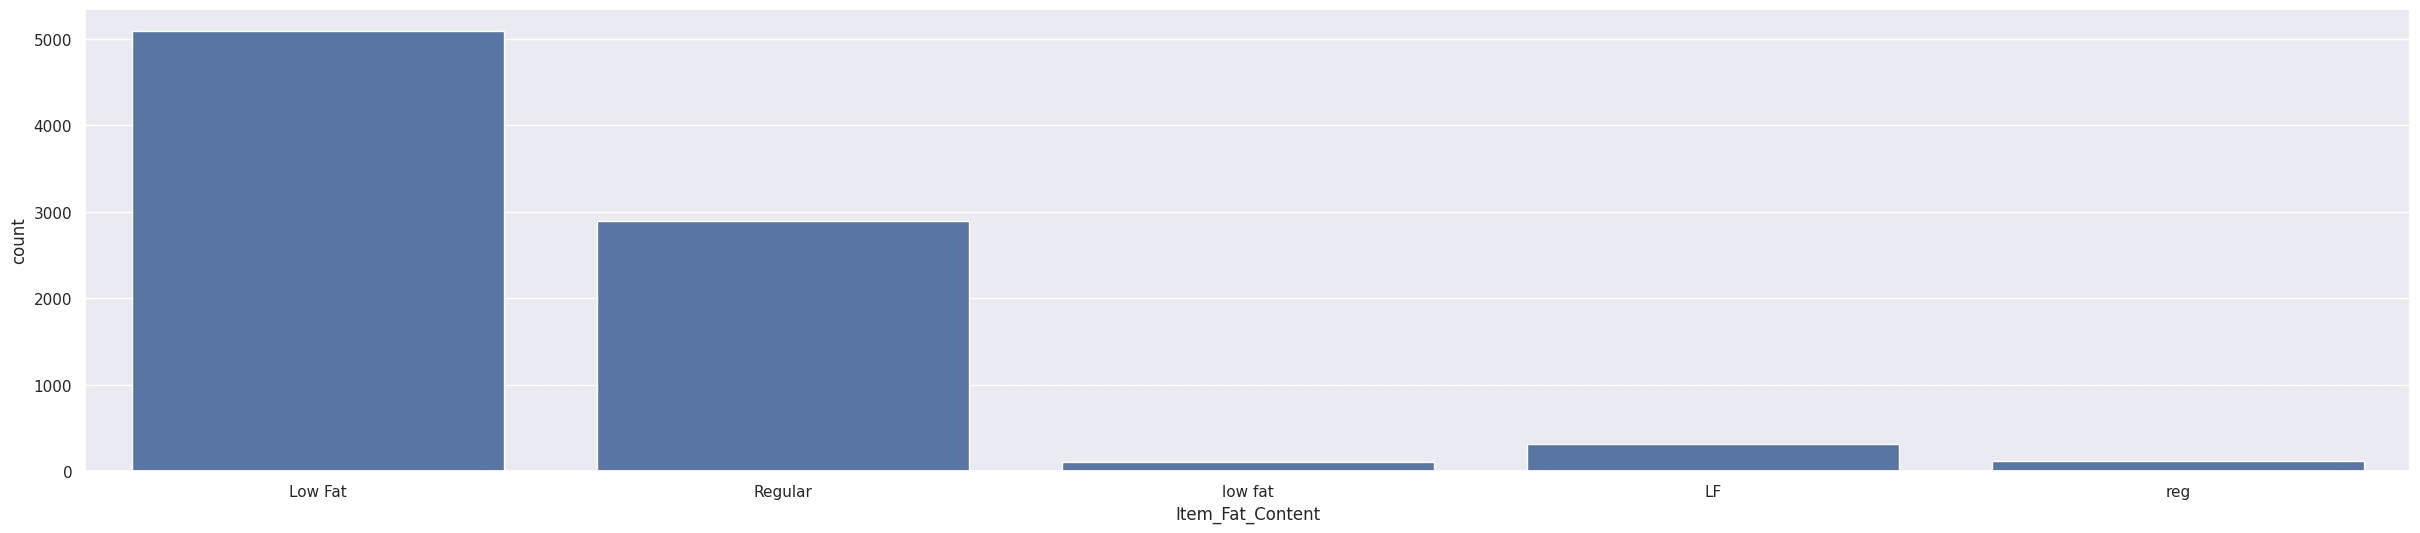

In [65]:
plt.figure(figsize=(30,6))
sns.countplot(data=Big_mart_data,x='Item_Fat_Content')
plt.show()

#DATA PREPROCESSING

In [66]:
Big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [67]:
#corrcting the multi-same catagories
Big_mart_data['Item_Fat_Content']=Big_mart_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [68]:
Big_mart_data['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [69]:
#Label Encoding

In [70]:
label_encoder=LabelEncoder()
Big_mart_data['Item_Fat_Content']=label_encoder.fit_transform(Big_mart_data['Item_Fat_Content'])
Big_mart_data['Outlet_Type']=label_encoder.fit_transform(Big_mart_data['Outlet_Type'])
Big_mart_data['Item_Type']=label_encoder.fit_transform(Big_mart_data['Item_Type'])
Big_mart_data['Outlet_Location_Type']=label_encoder.fit_transform(Big_mart_data['Outlet_Location_Type'])
Big_mart_data['Outlet_Size']=label_encoder.fit_transform(Big_mart_data['Outlet_Size'])


In [71]:
Big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


# Data Splidding And MODEL FITTING

In [72]:
#saparating features and target /output
X = Big_mart_data.drop(columns=['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis=1)
Y = Big_mart_data['Item_Outlet_Sales']

In [73]:
print(X)
print(Y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

## Splitting the Data

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [75]:
print(X.shape, X_train.shape, X_test.shape)


(8523, 9) (6818, 9) (1705, 9)



## Machine Learning Model Training

XGBoost Regressor

In [77]:
pip install --upgrade xgboost


In [78]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [80]:

pip install scikit-learn==1.0.2 xgboost

In [81]:

regressor = XGBRegressor()



In [82]:

regressor.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)

test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)


In [84]:
print('R Squared value for train data = ', r2_train)
print('R Squared value for test data = ', r2_test)


R Squared value for train data =  0.8674755650199335
R Squared value for test data =  0.5061538276750805
